# Section Three 
## Semi-supervised Training 

In [3]:
import numpy as np 
import sklearn 
from matplotlib import pyplot as plt 
import pandas as pd
from sklearn.utils import shuffle

In [4]:
# Load the data 
data = pd.read_csv("Surgical.csv")
headers = data.columns
data = data.to_numpy()
data = shuffle(data)
label = data[:, len(headers)-1]
x = data[:, 0:len(headers)-2]
# Train/test split 
trainX = x[0:int(len(x)* 0.75),:]
trainLabel = label[0:int(len(x)* 0.75)]
testX = x[int(len(x)* 0.75) : len(x), :]
testLabel = label[int(len(x)* 0.75): len(label)]

(array([10945.,  3690.]), array([0. , 0.5, 1. ]), <a list of 2 Patch objects>)

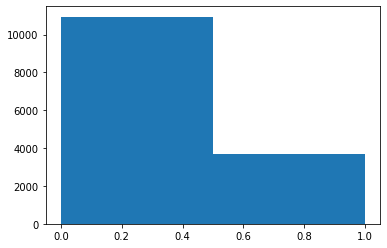

In [5]:
# Plotting histogram of the labels 
#    this shows how much of the values of the labels 
#     are distributed in the ranges plotted 
#     as seen the ratio of number of zeros to ones is 
#     about 10000/4000 or 2.5 
plt.hist(label, 2)

In [6]:
# Random selection of 0.01 of the data 
#   as the labelless data 
trainInputIdx = np.random.randint(0, len(trainX), int(len(trainX)* 0.01)) 
trainInput = trainX[trainInputIdx]
trainLabelInput = trainLabel[trainInputIdx]
temp_train = trainX
otherTrainX = np.delete(trainX, trainInputIdx, axis = 0)
otherTrainLabel = np.delete(trainLabel, trainInputIdx, axis = 0)

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logisticRegr = LogisticRegression(max_iter = 1000)
logisticRegr.fit(trainInput, trainLabelInput)
predictions = logisticRegr.predict(testX)
cm = metrics.confusion_matrix(testLabel, predictions)
print(cm)
#  F_1Score =  2*((precision*recall)/(precision+recall))
precision = cm[0,0] /(cm[0,0] + cm[0,1]) 
recall = cm[0,0] / (cm[0,0] + cm[1,0] ) 
print("f1 is :", 2 * precision* recall / (precision + recall ))
print("accuracy is ", (cm[0,0] + cm[1,1])/ len(testLabel)) 

[[2676   67]
 [ 860   56]]
f1 is : 0.8523650262780696
accuracy is  0.7466520907351736


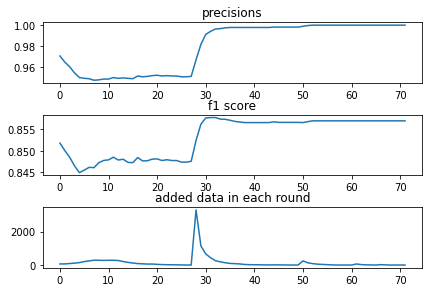

In [8]:
accuracy = 0.99
f1 = []
addedData = []
precisions = []
rounds = 0
while(len(otherTrainX)>0):
  #  Idx of the data predicted by a probability more than the threshold
  replacedIdx = np.where(logisticRegr.predict_proba(otherTrainX) >= accuracy)[0]
  # The algorithm stops under below circumstances
  if len(replacedIdx) == 0 : 
    accuracy -= 0.02
    replacedIdx = np.where(logisticRegr.predict_proba(otherTrainX) >= accuracy)[0]
    if accuracy < 0.85 or len(replacedIdx) == 0  : 
      break
  #  Append the data predicted by a high probability to the train data
  trainLabelInput = np.append (trainLabelInput, logisticRegr.predict(otherTrainX[replacedIdx]), axis = 0 )
  trainInput = np.append(trainInput, otherTrainX[replacedIdx], axis = 0 )
  otherTrainX = np.delete(otherTrainX, replacedIdx, axis = 0)
  # Train the model with new train data
  logisticRegr.fit(trainInput, trainLabelInput)
  predictions = logisticRegr.predict(testX)
  cm = metrics.confusion_matrix(testLabel, predictions)
  precision = cm[0,0] /(cm[0,0] + cm[0,1]) 
  recall = cm[0,0] / (cm[0,0] + cm[1,0] ) 
  rounds += 1 
  addedData.append(len(replacedIdx))
  precisions.append(precision)
  f1.append( 2 * precision* recall / (precision + recall ))
figure, (ax1, ax2, ax3) =  plt.subplots(3)
figure.tight_layout() 
ax1.set_title('precisions')
ax1.plot(range(rounds), precisions)
ax2.set_title('f1 score')
ax2.plot(range(rounds), f1)
ax3.set_title('added data in each round')
ax3.plot(range(rounds), addedData)